In [3]:
import pandas as pd

In [4]:
df=pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\projects\kaggle\playground-series-s5e7\train.csv")

In [5]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [6]:
missing_data = df.isnull()
missing_data.head(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

id
id
False    18524
Name: count, dtype: int64

Time_spent_Alone
Time_spent_Alone
False    17334
True      1190
Name: count, dtype: int64

Stage_fear
Stage_fear
False    16631
True      1893
Name: count, dtype: int64

Social_event_attendance
Social_event_attendance
False    17344
True      1180
Name: count, dtype: int64

Going_outside
Going_outside
False    17058
True      1466
Name: count, dtype: int64

Drained_after_socializing
Drained_after_socializing
False    17375
True      1149
Name: count, dtype: int64

Friends_circle_size
Friends_circle_size
False    17470
True      1054
Name: count, dtype: int64

Post_frequency
Post_frequency
False    17260
True      1264
Name: count, dtype: int64

Personality
Personality
False    18524
Name: count, dtype: int64



In [8]:
df["Stage_fear"].value_counts()

Stage_fear
No     12609
Yes     4022
Name: count, dtype: int64

In [9]:
df["Personality"].value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

In [10]:
df["Drained_after_socializing"].value_counts()

Drained_after_socializing
No     13313
Yes     4062
Name: count, dtype: int64

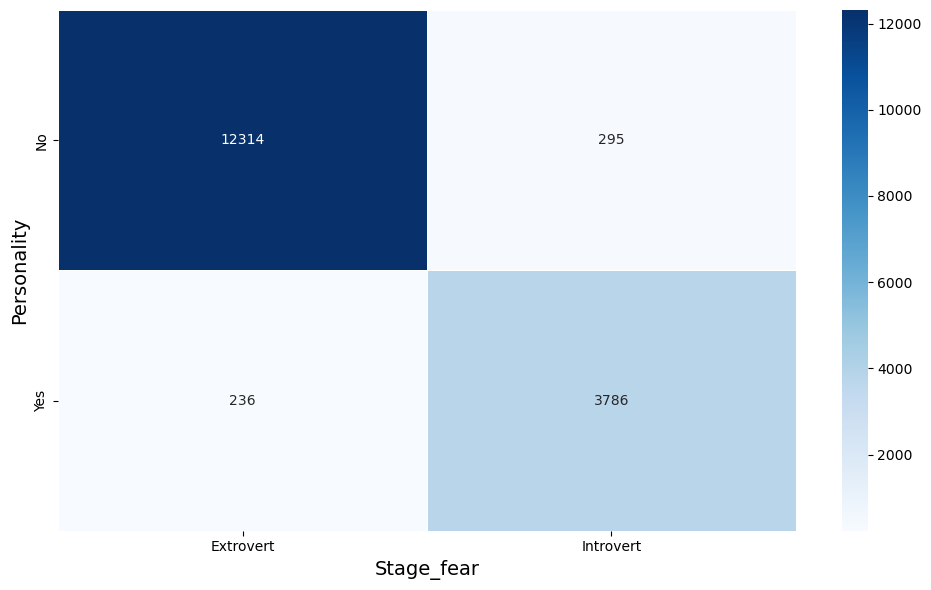

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab of PEC Allocation vs VSEC allocation
crosstab = pd.crosstab(df["Stage_fear"], df["Personality"])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

plt.xlabel("Stage_fear", fontsize=14)
plt.ylabel("Personality", fontsize=14)
plt.tight_layout()
plt.show()


In [12]:
df.dtypes

id                             int64
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [13]:
from sklearn.preprocessing import binarize

In [14]:
df["Stage_fear"].replace("Yes","1",inplace=True)
df["Stage_fear"].replace("No","0",inplace=True)
df["Stage_fear"].value_counts()

C:\Users\ayush\AppData\Local\Temp\ipykernel_16952\233069718.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Stage_fear"].replace("Yes","1",inplace=True)
C:\Users\ayush\AppData\Local\Temp\ipykernel_16952\233069718.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Stage_fear
0    12609
1     4022
Name: count, dtype: int64

In [15]:
import numpy as np
df["Stage_fear"].replace(np.nan,"0",inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_16952\593193144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Stage_fear"].replace(np.nan,"0",inplace=True)


In [18]:
df["Stage_fear"] = pd.to_numeric(df["Stage_fear"], errors='coerce')


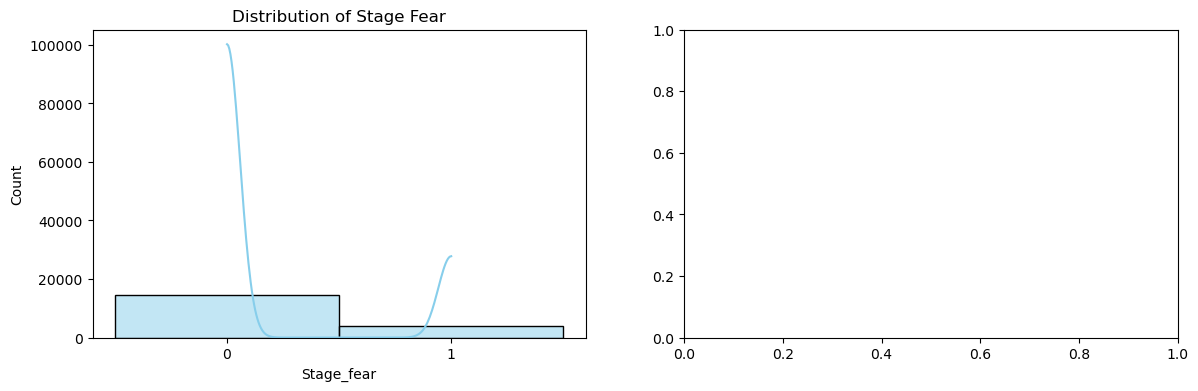

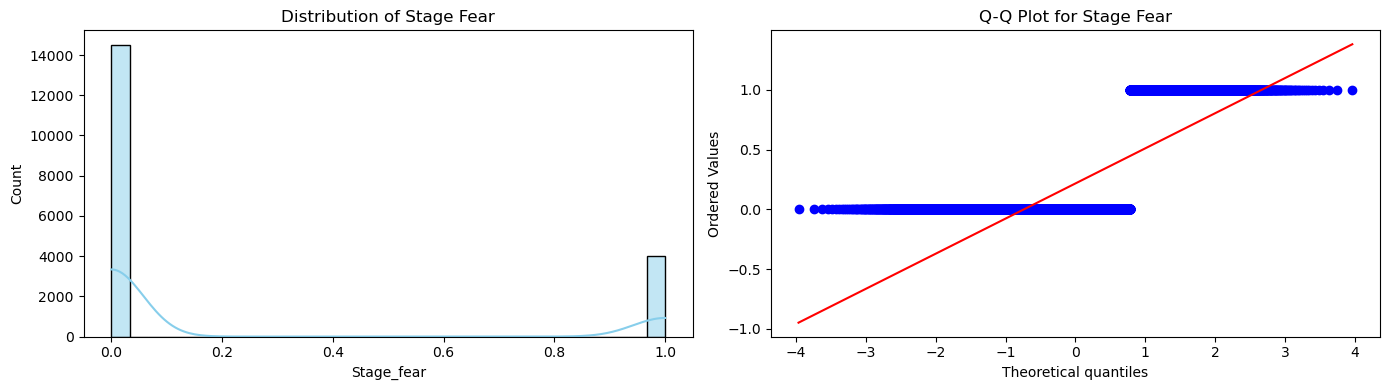

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

# Check for missing values before plotting
if df["Stage_fear"].isnull().any():
    print("Warning: Missing values detected in 'Stage_fear'. Filling with median.")
    stage_fear = df["Stage_fear"].fillna(df["Stage_fear"].median())
else:
    stage_fear = df["Stage_fear"]

plt.figure(figsize=(14, 4))

# Histogram + KDE
plt.subplot(1, 2, 1)
sns.histplot(stage_fear, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Stage Fear")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(stage_fear, dist="norm", plot=plt)
plt.title("Q-Q Plot for Stage Fear")

plt.tight_layout()
plt.show()
